In [1]:
from IPython.display import display, Javascript

# Disable scrolling in output cells
display(
    Javascript(
        """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
    )
)
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
# Set background color to black and text color to white
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

# Import warnings module
import warnings

# Ignore all pandas warnings
warnings.filterwarnings("ignore", category=UserWarning)


<IPython.core.display.Javascript object>

In [2]:
from typing import List
import os
import pandas as pd
import numpy as np
import time
import seaborn as sns
import datetime

In [3]:
dataset_df = pd.read_csv("dataset.csv")
dataset_df

,MaxHourMinIntensity_t-2,SumMinIntensity_t-2,SumMinIntensityTop2Hr_t-2,MaxHourSteps_t-2,SumSteps_t-2,SumStepsTop2Hr_t-2,WeightPounds_t-2,Fat_t-2,BMI_t-2,AvgTotalSteps_t-2,...,AvgValue_t-1,SumValue_t-1,AvgStepTotal_t-1,SumStepTotal_t-1,AvgTotalIntensity_t-1,SumTotalIntensity_t-1,AvgAverageIntensity_t-1,SumAverageIntensity_t-1,VeryActiveMinutes_t-1,VeryActiveMinutes
0,0.0,0.0,0.0,143.0,13158.0,283.0,115.963147,22.0,22.650000,22.650000,...,22.650000,35424.599403,22.650000,35424.599403,22.650000,35424.599403,22.650000,35424.599403,21.0,30.0
1,56.0,318.0,102.0,1766.0,21470.0,3445.0,115.963147,22.0,22.650000,22.650000,...,22.650000,35401.949404,22.650000,35401.949404,22.650000,35401.949404,22.650000,35401.949404,30.0,29.0
2,57.0,293.0,111.0,2670.0,20920.0,4449.0,115.963147,22.0,22.650000,22.650000,...,22.650000,35424.599403,22.650000,35424.599403,22.650000,35424.599403,22.650000,35424.599403,29.0,36.0
3,95.0,364.0,161.0,2768.0,19370.0,4913.0,115.963147,22.0,22.650000,22.650000,...,22.650000,35424.599403,22.650000,35424.599403,22.650000,35424.599403,22.650000,35424.599403,36.0,38.0
4,90.0,349.0,132.0,3616.0,25338.0,5659.0,115.963147,22.0,22.650000,22.650000,...,22.650000,35424.599403,22.650000,35424.599403,22.650000,35424.599403,22.650000,35424.599403,38.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,58.0,354.0,95.0,2033.0,18852.0,3417.0,159.394222,25.0,27.379999,27.379999,...,27.379999,42822.318687,27.379999,42822.318687,27.379999,42822.318687,27.379999,42822.318687,3.0,0.0
416,51.0,344.0,101.0,1390.0,15874.0,2668.0,159.394222,25.0,27.379999,27.379999,...,27.379999,42822.318687,27.379999,42822.318687,27.379999,42822.318687,27.379999,42822.318687,0.0,2.0
417,29.0,153.0,58.0,952.0,7344.0,1654.0,159.394222,25.0,27.379999,27.379999,...,27.379999,42822.318687,27.379999,42822.318687,27.379999,42822.318687,27.379999,42822.318687,2.0,3.0
418,59.0,408.0,106.0,1993.0,20724.0,3713.0,159.394222,25.0,27.379999,27.379999,...,27.379999,42822.318687,27.379999,42822.318687,27.379999,42822.318687,27.379999,42822.318687,3.0,3.0


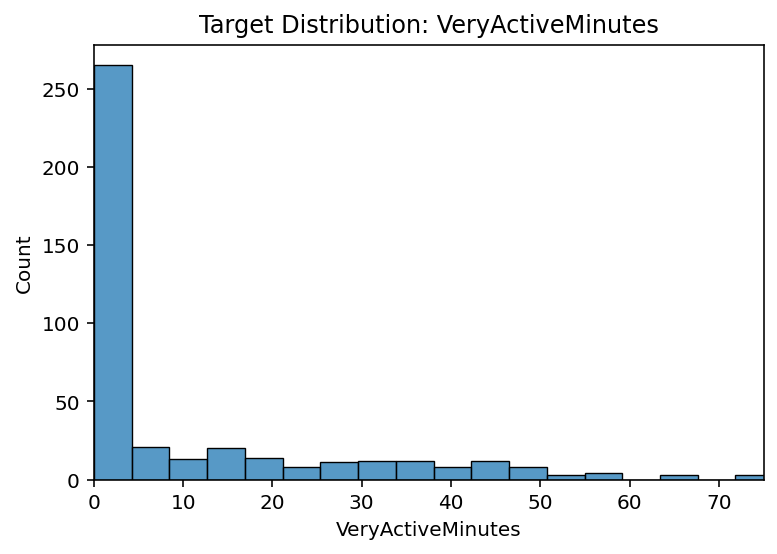

In [4]:
sns.histplot(dataset_df["VeryActiveMinutes"])

plt.title("Target Distribution: VeryActiveMinutes")
plt.xlim(0, 75)
plt.show()

In [5]:
dataset_df["VeryActiveMinutes"].describe()

count    420.000000
mean      11.023810
std       19.498348
min        0.000000
25%        0.000000
50%        0.000000
75%       16.000000
max      186.000000
Name: VeryActiveMinutes, dtype: float64

In [6]:
# Squared Error if Just Predicting the Mean
sum((dataset_df["VeryActiveMinutes"] - dataset_df["VeryActiveMinutes"].mean()) ** 2) / len(dataset_df["VeryActiveMinutes"])

379.2803854875261

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

In [8]:
# Separate features and target
X = dataset_df.drop(columns=['VeryActiveMinutes'])
y = dataset_df['VeryActiveMinutes']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Perform linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and compute the performance
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Compute t-statistics for the features
t_stats, p_values = stats.ttest_ind(X_train, X_test)
print(f"t-statistics: {t_stats}")
print(f"p-values: {p_values}")

# Test if regularization is necessary using RidgeCV
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_cv.fit(X_train, y_train)

print(f"Best alpha for regularization: {ridge_cv.alpha_}")

Mean Squared Error: 304.82
t-statistics: [-0.02705363  0.10319186 -0.21962301 -0.36785918  0.00337365 -0.35565478
 -0.44057845  1.3059143  -0.52610787 -0.52610787  0.98043598 -0.52610787
  0.98043598 -0.52610787  0.98043598 -0.52610787  0.98043598 -0.52610787
  0.98043598 -0.52610787  0.98043598 -0.52610787  0.98043598 -0.52610787
  0.98043598 -0.52610787  0.98043598 -0.52610787  0.98043598 -0.52610787
  0.98043598 -0.52610787  0.98043598 -0.52610787  0.98043598 -0.52610787
  0.98043598 -0.52610787  0.98043598 -0.52610787  0.98043598 -0.52610787
  0.98043598 -0.52610787  0.98043598 -0.52610787  0.98043598 -0.52610787
  0.98043598  1.34344999  1.21951535  0.27340038  0.95538112  1.30207333
  0.33906247  1.09234088 -0.72342003  0.94608401 -0.79031312 -0.79031312
  0.28532664 -0.79031312  0.28532664 -0.79031312  0.28532664 -0.79031312
  0.28532664 -0.79031312  0.28532664 -0.79031312  0.28532664 -0.79031312
  0.28532664 -0.79031312  0.28532664 -0.79031312  0.28532664 -0.79031312
  0.285326

# Feature Importance Via RFE on Linear Regression Model

In [9]:
X = dataset_df.drop(columns=['VeryActiveMinutes'])
y = dataset_df['VeryActiveMinutes']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Perform Recursive Feature Elimination with cross-validation
estimator = LinearRegression()
rfe_cv = RFECV(estimator, step=1, cv=5, scoring='neg_mean_squared_error')
rfe_cv.fit(X_train, y_train)

# Get the selected features and their ranks
selected_features = pd.DataFrame({'Feature': X.columns, 'Rank': rfe_cv.ranking_}).sort_values(by='Rank')
print("Selected Features and Their Ranks:")
print(selected_features.head())

# Train a Lasso model for comparison
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Get the Lasso coefficients
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
lasso_coefs['Absolute_Coefficient'] = np.abs(lasso_coefs['Coefficient'])
lasso_coefs = lasso_coefs.sort_values(by='Absolute_Coefficient', ascending=False)

# Report the top 5 most important features
print("\nTop 5 Most Important Features (RFE):")
print(selected_features.head(5)['Feature'].values)

print("\nTop 5 Most Important Features (Lasso):")
print(lasso_coefs.head(5)['Feature'].values)

Selected Features and Their Ranks:
                    Feature  Rank
97  AvgAverageIntensity_t-1     1
56         WeightPounds_t-1     1
6          WeightPounds_t-2     2
47  AvgAverageIntensity_t-2     3
89    AvgTotalTimeInBed_t-1     4

Top 5 Most Important Features (RFE):
['AvgAverageIntensity_t-1' 'WeightPounds_t-1' 'WeightPounds_t-2'
 'AvgAverageIntensity_t-2' 'AvgTotalTimeInBed_t-1']

Top 5 Most Important Features (Lasso):
['Fat_t-1' 'VeryActiveMinutes_t-1' 'MaxHourMinIntensity_t-1'
 'MaxHourMinIntensity_t-2' 'VeryActiveMinutes_t-2']


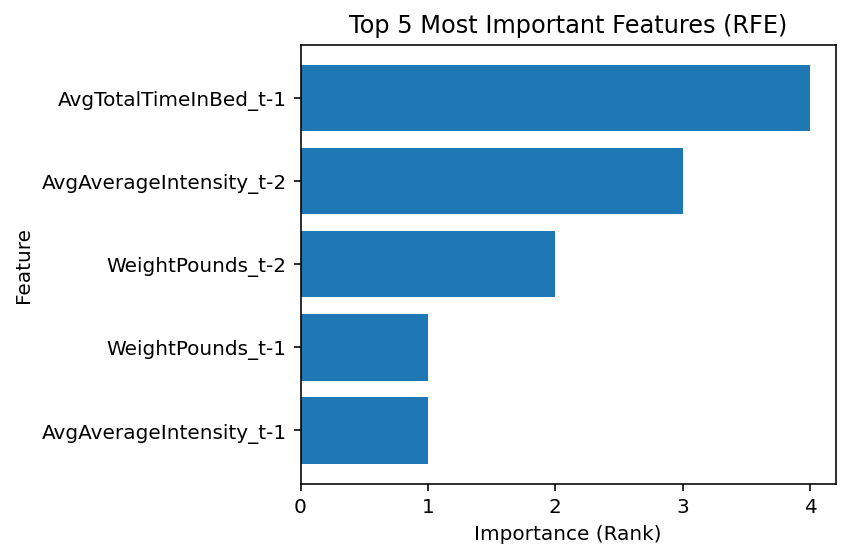

In [18]:
# Get the top 5 most important features from RFE
top_features_rfe = selected_features.head(5)
fig, ax = plt.subplots()
# Plot the top 5 most important features from RFE
plt.barh(top_features_rfe['Feature'], top_features_rfe['Rank'])
plt.xlabel('Importance (Rank)')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features (RFE)')
# set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# set the tight layout
fig.tight_layout()

# save the figure as a PNG file with white background
fig.savefig('feature_importance.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

# Feature Importance Via Shapley Values

In [10]:
import shap
import matplotlib.pyplot as plt

In [12]:
# Separate features and target
X = dataset_df.drop(columns=['VeryActiveMinutes'])
y = dataset_df['VeryActiveMinutes']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Use SHAP to explain the linear model
explainer = shap.Explainer(lr, X_train)
shap_values = explainer(X_test)

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': mean_abs_shap_values}).sort_values(by='Importance', ascending=False)

# Report the top 5 most important features
print("Top 5 Most Important Features:")
print(feature_importance.head(5))

Top 5 Most Important Features:
                            Feature  Importance
6                  WeightPounds_t-2  369.062258
56                 WeightPounds_t-1  355.911419
11             AvgTotalDistance_t-2   16.504635
15  AvgLoggedActivitiesDistance_t-2   16.504635
19  AvgModeratelyActiveDistance_t-2   16.504635


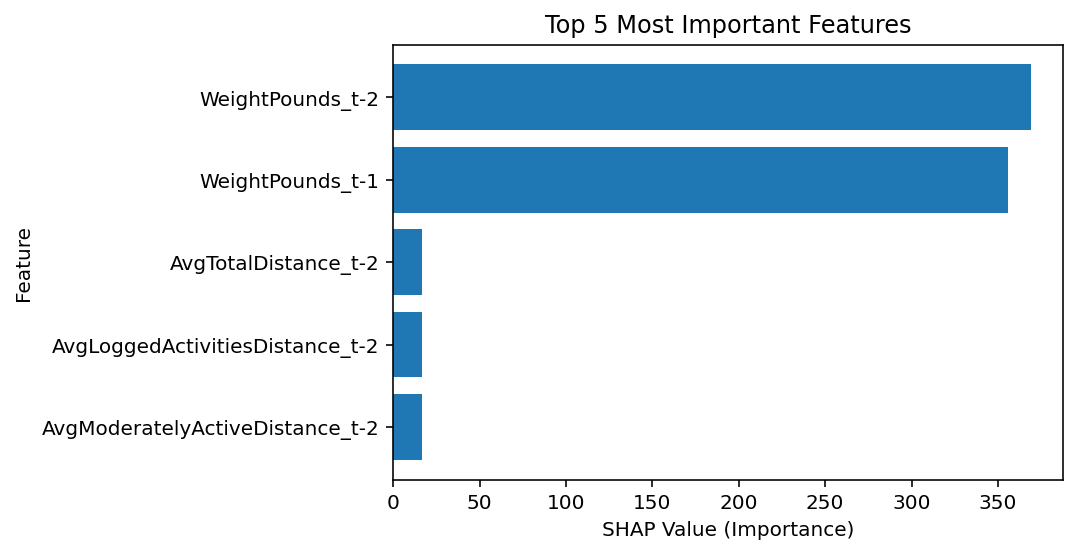

In [13]:
# Plot the top 5 most important features
top_features = feature_importance.head(5)
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1])
plt.xlabel('SHAP Value (Importance)')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features')
plt.show()

# Discussion of RFE vs. Shapley Values for Feature Importance
Recursive Feature Elimination (RFE) and Shapley Values serve different purposes when it comes to analyzing feature importance. RFE is a feature selection technique that iteratively removes the least important features from the model and aims to find the optimal subset of features that provides the best model performance. In contrast, Shapley Values provide an explanation for the model's predictions and quantify the contribution of each feature for individual instances.

In a linear regression setting, RFE might be a better method for analyzing feature importance for the following reasons:

Interpretability: RFE directly uses the model's coefficients to rank the features, which is easily interpretable in a linear regression context. The magnitude of the coefficients directly indicates the importance of the features in the model. Shapley Values, on the other hand, estimate the average contribution of each feature across all possible feature combinations, which might be harder to interpret in a linear regression context.

Model simplification: RFE aims to find the optimal subset of features that provides the best model performance, effectively simplifying the model by reducing its complexity. Shapley Values do not inherently focus on simplifying the model, as they provide importance values for all features without selecting a subset.

# Feature Importance Via Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
# Separate features and target
X = dataset_df.drop(columns=['VeryActiveMinutes'])
y = dataset_df['VeryActiveMinutes']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)

# Report the top 5 most important features
print("Top 5 Most Important Features (Random Forest):")
print(feature_importances.head(5))

Top 5 Most Important Features (Random Forest):
                    Feature  Importance
99    VeryActiveMinutes_t-1    0.337481
4              SumSteps_t-2    0.058982
0   MaxHourMinIntensity_t-2    0.044080
54             SumSteps_t-1    0.043809
3          MaxHourSteps_t-2    0.042233


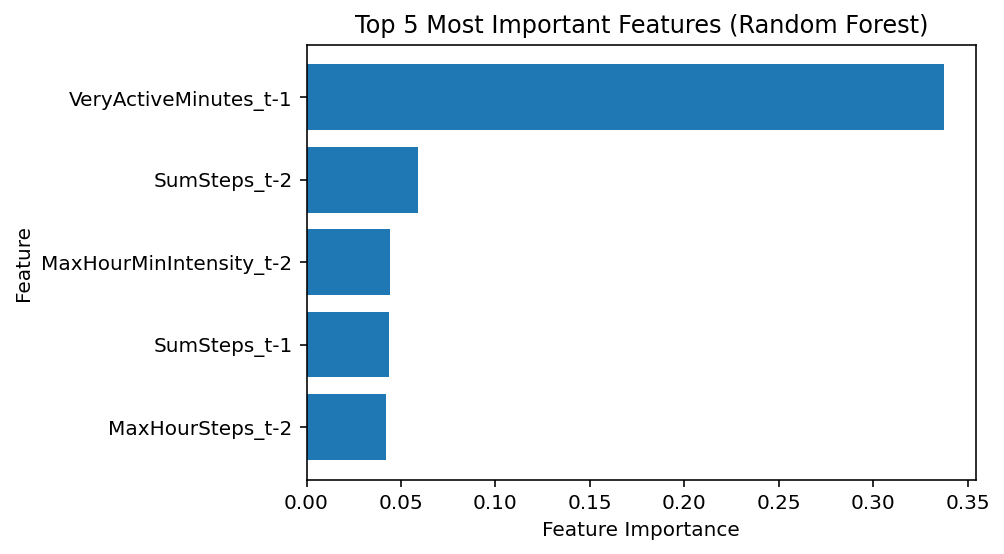

In [26]:
# Plot the top 5 most important features
top_features_rf = feature_importances.head(5)
plt.barh(top_features_rf['Feature'][::-1], top_features_rf['Importance'][::-1])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features (Random Forest)')
plt.show()

# Causal Inference

In [30]:
from causalml.inference.meta import SLearner

In [35]:
treatment_rf = 'VeryActiveMinutes_t-1'
treatment_rfe = 'AvgAverageIntensity_t-1'
outcome = 'VeryActiveMinutes'

# Define treatment and control groups
treatment_group = dataset_df[treatment_rf]

# Prepare dataset for causal inference
X = dataset_df.drop(columns=[outcome, treatment_rf, treatment_rfe]).values
y = dataset_df[outcome].values
treatment = treatment_group.values

# Split data into training and testing sets
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X, y, treatment, test_size=0.2, random_state=42
)

# Instantiate the S-Learner with a linear regression model
learner_s = SLearner(LinearRegression())

# Fit the model
learner_s.fit(X_train, y_train, treatment_train)

# Estimate the average treatment effect on the treated (ATT)
att = learner_s.estimate_ate(X_test, y_test, treatment_test)[1]
print(f"Estimated causal effect of {treatment_rf} on {outcome}: {att}")

# Repeat the analysis for the second treatment variable
treatment_group = df[treatment_rfe]
treatment = treatment_group.values
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X, y, treatment, test_size=0.2, random_state=42
)

learner_s.fit(X_train, y_train, treatment_train)
att = learner_s.estimate_ate(X_test, y_test, treatment_test)[1]
print(f"Estimated causal effect of {treatment_rfe} on {outcome}: {att}")

Estimated causal effect of VeryActiveMinutes_t-1 on VeryActiveMinutes: None
Estimated causal effect of AvgAverageIntensity_t-1 on VeryActiveMinutes: None


# Visualize Causal Graph

In [ ]:
import networkx as nx

In [ ]:
# Parse the graph string to create a directed graph
graph = nx.DiGraph(nx.nx_pydot.from_pydot(causal_graph))

# Draw the graph with labels
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color="skyblue", edge_color="grey", font_size=10, node_size=2000, arrows=True)

# Display the graph
plt.show()